In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
# header for chat

head_chat = ['time', 'device_id', 'login', 'channel', 'country', 'player', 'game']

# Import data 

Here we import data from csv

In [31]:
chat = pd.read_csv('chat.csv', names = head_chat)
stream = pd.read_csv('stream.csv')

Testing and getting familiar with the data

In [33]:
print(stream.head()) # Data from Stream Table

                  time                                 device_id  \
0  2015-01-01 18:33:52  40ffc2fa6534cf760becbdbf5311e31ad069e46e   
1  2015-01-01 23:35:33  9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760   
2  2015-01-01 04:39:38  2f9c3f9ee1033b71a3819564243f20ef3bec0183   
3  2015-01-01 11:15:30  0cda8226ba2583424c80c3c1c22c1256b080ad17   
4  2015-01-01 11:28:19  e3288ca5e3153aa85e32f64cdd994b7666968dcf   

                                      login  channel country    player  \
0  085c1eb7b587bfe654f0df7b4ba7f4fc4013636c    frank      US  iphone_t   
1  5ad49a7b408ce452140b180dd6efb57a9f4d22c7   george      US      site   
2  5b9a43e68f019185f55615d0b83019dee4b5d06f    frank      US      site   
3  02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b  estelle      CH      site   
4  b920c228acbcbebee26d9c79f6eb73b73a9480c7    morty      FR      site   

                  game stream_format subscriber  
0    League of Legends           NaN        NaN  
1                 DayZ       chunked      Fals

In [34]:
print(chat.head()) # Data from Chat Table

                  time                                 device_id  \
0  2015-01-01 18:45:50  70e2b95b5ac0d4c227e46966658d16b3e044996e   
1  2015-01-01 01:16:57  f2b9065b55fd80d6aa653ce989b489f4ec5198be   
2  2015-01-01 16:22:10  d448ba963d7e1023dd1b0a40b95d4f6611750692   
3  2015-01-01 03:58:13  8d6823dc52b400b50aebf269bf1f03a36d19eeaa   
4  2015-01-01 11:47:35  16c1e39594d62358d27ae604ad43a071f0d86bc4   

                                      login  channel country    player  \
0  5c2f5c1f19a7738e16ed0be551d865e8a8fce71d    jerry      BY       NaN   
1  0d77740e4fb5ce77d94f9f6c8ef1f762990d0344   elaine      HK       NaN   
2  77ab14c1fb815e1c369ba0cf7d4c56b4fe489997    frank      GB  iphone_t   
3  91cb88c0743761589273fc5e800e7743ece46494    frank      US  iphone_t   
4  51a9234f83d656607cfd7f26690c12d2ffbce353  estelle      DE       NaN   

                               game  
0                            Dota 2  
1  Devil May Cry 4: Special Edition  
2                 League of Lege

# Create Data Frames

In [38]:
stream = pd.DataFrame(stream)
chat = pd.DataFrame(chat)

In [42]:
stream.info() # Check data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526299 entries, 0 to 526298
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           526299 non-null  object
 1   device_id      526271 non-null  object
 2   login          526299 non-null  object
 3   channel        526299 non-null  object
 4   country        509135 non-null  object
 5   player         526299 non-null  object
 6   game           523175 non-null  object
 7   stream_format  267332 non-null  object
 8   subscriber     273814 non-null  object
dtypes: object(9)
memory usage: 36.1+ MB


In [43]:
chat.info() # Check data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148562 entries, 0 to 148561
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   time       148562 non-null  object
 1   device_id  148560 non-null  object
 2   login      148562 non-null  object
 3   channel    148562 non-null  object
 4   country    142641 non-null  object
 5   player     37536 non-null   object
 6   game       148221 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB


# Create table game vs viewers

Create a data frame with games and total of viewers, then plot

In [143]:
# Data Frame games vs viewers
games_viewers = stream.groupby('game').login.count().reset_index()
games_viewers = games_viewers.sort_values(by=['login'], ascending = False)
games_viewers_select = games_viewers.sort_values(by=['login']) #list sorted 
# Data arrays
# I have created to use it for x and y values
games_list = games_viewers_select['game']
viewers = games_viewers_select['login']

# Create bar plot with Data Frame

- First I have created the figure
- Ploted a horizontal bar with len of the game_list as x and viewers as y values
- Then created a subplot and the axis
- The last is give a labels and titles
- And save de fig as a "top_game_viewers.png"

/home/hector/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


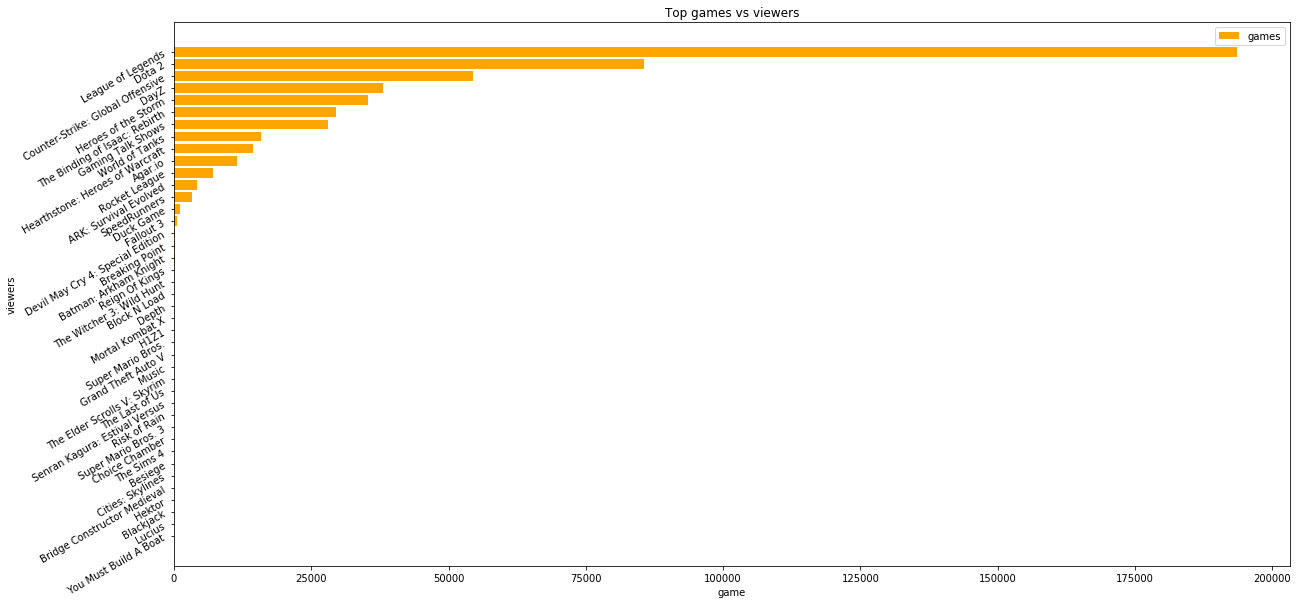

In [141]:
plt.figure(figsize=(20,10))
plt.barh(range(len(games_list)), viewers, color='orange')
ax = plt.subplot()
ax.set_yticks(range(len(games_list)))
ax.set_yticklabels(games_list, rotation=30)
plt.ylabel('viewers')
plt.xlabel('game')
plt.title('Top games vs viewers')
plt.legend(['games'])
plt.savefig('top_game_viewers.png')
plt.show()


---

# Pie Chart: League of Legends Viewers VS Whereabouts

## - Create the Data Frame of the League of Legends viewers per country

In [162]:
# Select all Lol viewers, per country
lol = stream[stream.game == 'League of Legends'].groupby('country').login.count().reset_index()

# Sort by viewers descending
lol_sorted = lol.sort_values(by='login', ascending = False)

# Test
lol_sorted.head()

,country,login
147,US,85606
27,CA,13034
36,DE,10835
51,GB,6964
143,TR,4412


Create the list of values and the labels for the pie

In [165]:
labels = lol_sorted['country']
values = lol_sorted['login']

Create the Pie Chart

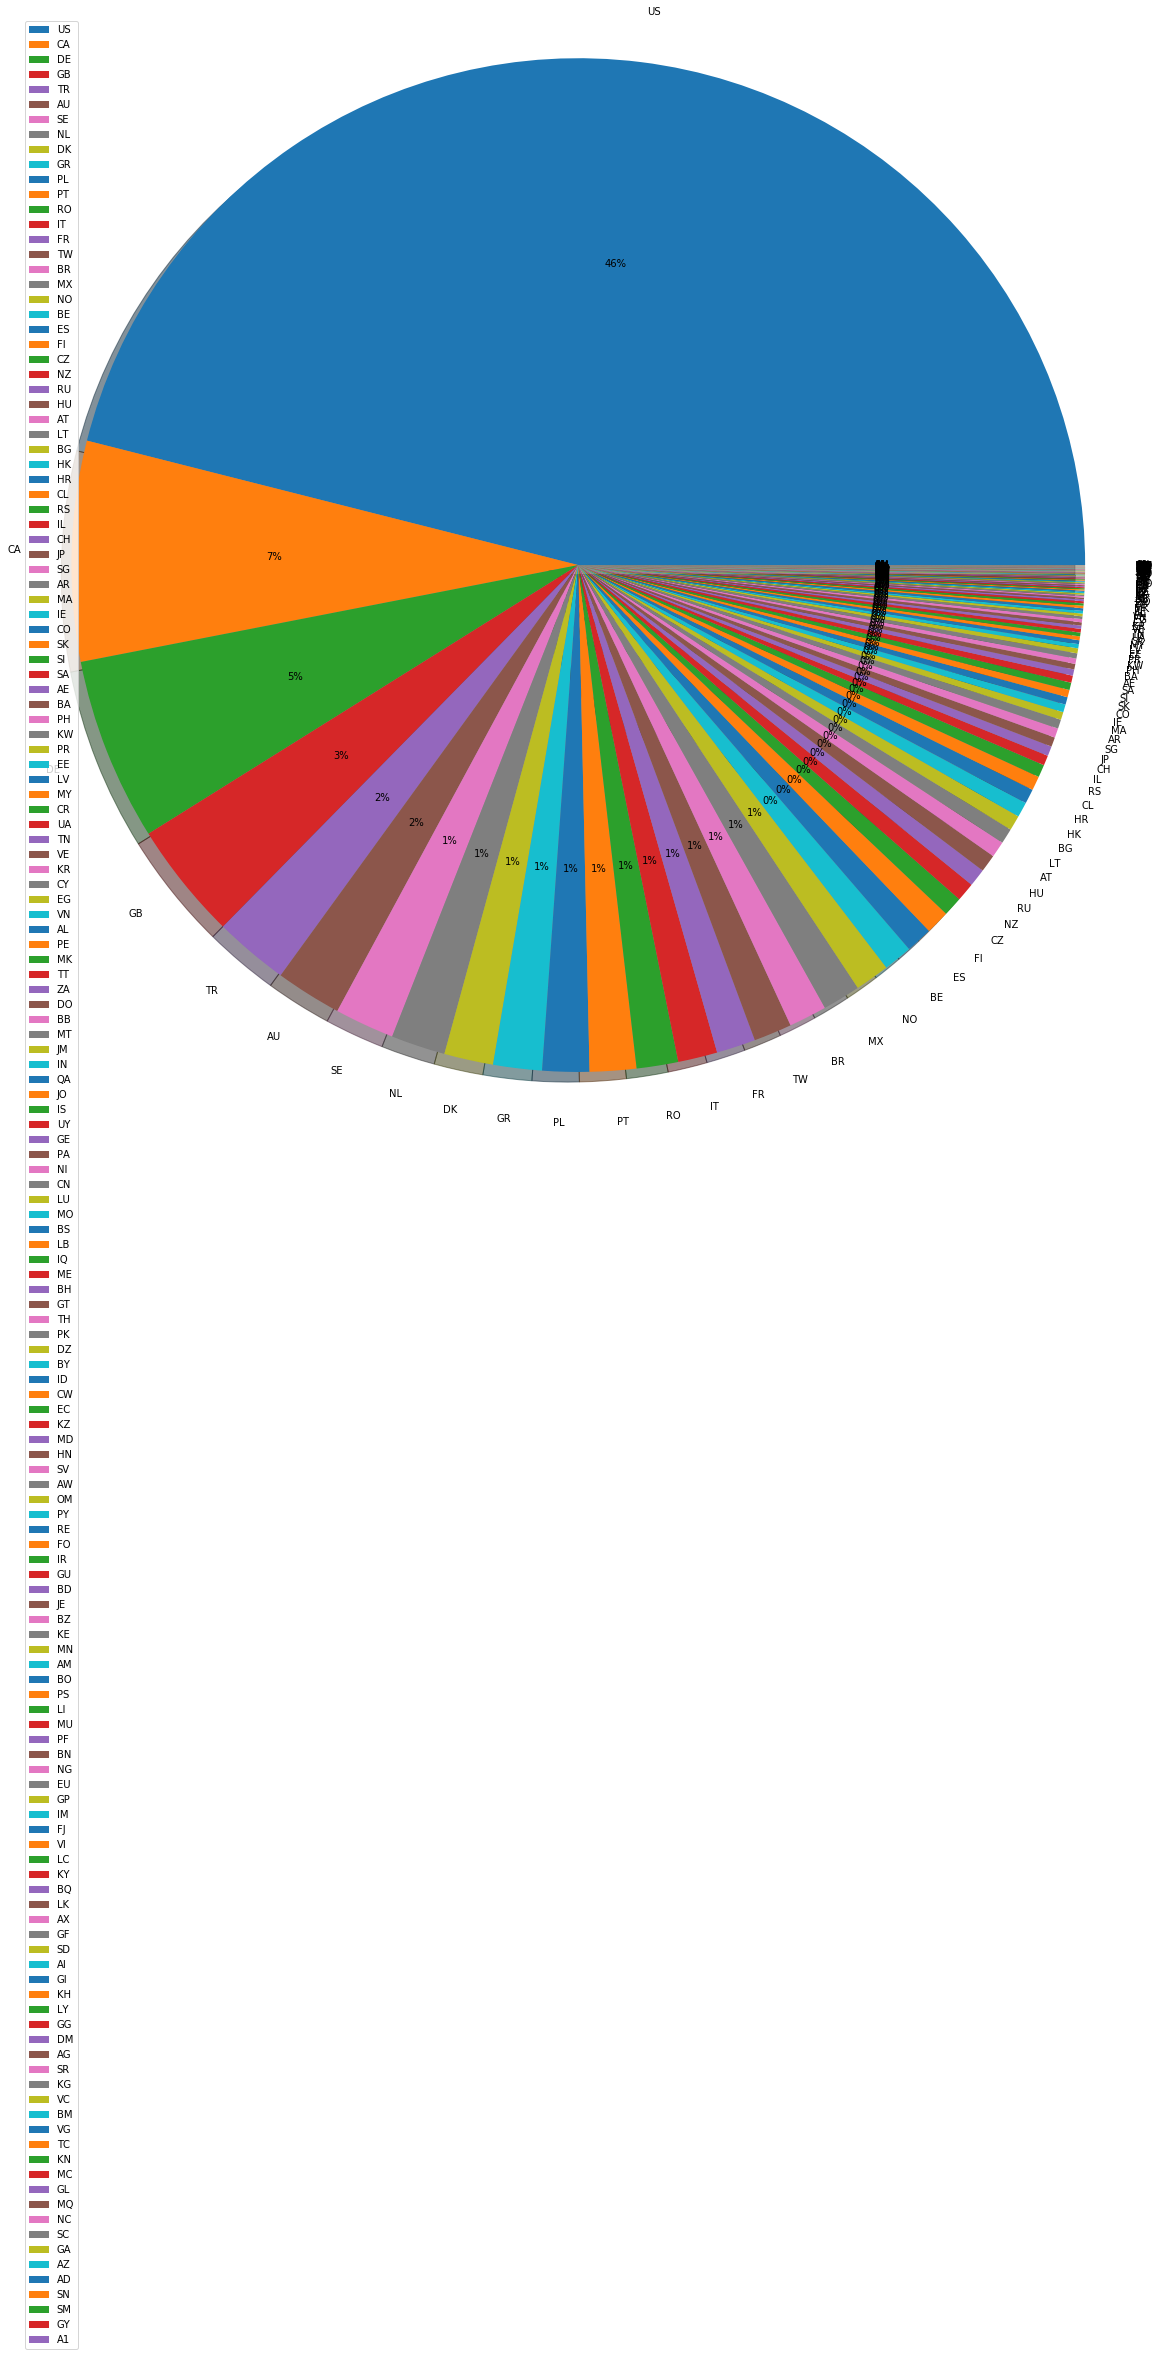

In [182]:
plt.figure(figsize=(20,20))
ax = plt.subplot()
ax.pie(values, labels=labels,shadow=True, autopct='%d%%')
ax.axis('equal')
ax.legend(labels)
plt.savefig('lol_viewers_country.png')
plt.show()

I have to figure out how to present better this kind of info, this kind of graph may be is not the way to show this data

-----